# Build a Simple Neural Network 

多层感知机（multilayer perceptron, MLP) 在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。

* 主要激活函数

ReLU函数 sigmoid函数  tanh函数 [链接：](https://blog.csdn.net/weixin_44613063/article/details/90240900?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165188424216782388033085%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165188424216782388033085&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-90240900-null-null.142^v9^pc_search_result_cache,157^v4^control&utm_term=torch%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0&spm=1018.2226.3001.4187)

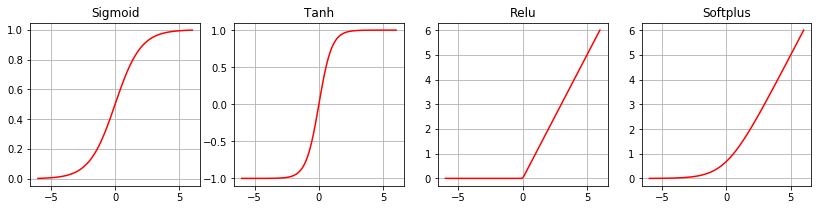

In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x=torch.linspace(-6,6,100)
sigmoid=nn.Sigmoid()    #Sigmoid激活函数;
ysigmoid=sigmoid(x)
tanh=nn.Tanh()          #Tanh激活函数
ytanh=tanh(x)
relu=nn.ReLU()          #ReLU激活函数
yrelu=relu(x)
softplus=nn.Softplus()  #Softplus激活函数
ysoftplus=softplus(x)


plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"-r")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"-r")
plt.title("Tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"-r")
plt.title("Relu")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftplus.data.numpy(),"-r")
plt.title("Softplus")
plt.grid()
plt.show()

* 定义网络

In [3]:
class MLP(nn.Module):
    def __init__(self,k_in,k_h,k_out):
        super(MLP,self).__init__()
        self.fc1 = torch.nn.Linear(k_in,k_h)
        self.fc2 = torch.nn.Linear(k_h,k_out)
        self.sd = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = self.fc1(x)                   # n*k_in -> n*k_h
        x = self.sd(x)                    # 激活
        x = self.fc2(x)                   # n*k_h -> n*k_out
        x = self.sd(x)                    # 激活
        x = x.squeeze(-1)                 # 去除多余维度
        return x
    


* 训练

In [4]:
def train(k_in, k_h, k_out,batch_size,lr,epochs):
    eval_ = {'cost': []}                             #损失字典
    model = MLP(k_in,k_h,k_out)
    print(model)                                     #显示结构
    cost = torch.nn.CrossEntropyLoss()               #损失函数
    optimizer = torch.optim.Adam(model.parameters()) #优化函数
    #装载数据
    data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                                    batch_size = batch_size,
                                                    shuffle = True)
    
    train_correct=0
    for epoch in range(epochs):
        sum_loss=0
        n = 0
        for data in data_loader_train:
            inputs,labels=data                       #inputs 维度：[64,1,28,28]
            inputs=torch.flatten(inputs,start_dim=1) #展平数据，转化为[64,784]
            outputs = model(inputs)              #得到预测值   
            #loss=cost(outputs,labels)            #计算损失 
            loss = cost(outputs,labels).sum()    #数据集损失函数的值=每个样本的损失函数值的和。  
            optimizer.zero_grad()                #对优化函数梯度清零
            loss.backward()                      # 计算损失对于各个参数的梯度
            optimizer.step()                     # 执行单步优化操作：更新参数
            sum_loss+=loss.item()
            n += labels.shape[0]
        print('批训练损失：',sum_loss / n)
        eval_['cost'].append(sum_loss / n)     #保存到字典
        
            # print(X.shape,y.shape) 
    model.eval()
    #torch.save(model,"mlp.pkl")        #保存模型
    torch.save(model.state_dict(), 'net_params.pth')  #保存模型参数
    
    return eval_
    

* 测试

In [5]:
def test(batch_size):
    
    test_correct = 0
    state_dict = torch.load('net_params.pth')         #读取模型参数
    model = MLP(k_in,k_h,k_out)                       #定义模型
    model.load_state_dict(state_dict)                 #读入参数
#     inputs, lables = data_test
#     outputs = model(inputs)
#     COF_ts = np.corrcoef(outputs.data, lables.data, rowvar=False)[0, 1]
    #装载数据
    data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                                    batch_size = batch_size,
                                                    shuffle = True)
    
    for data in data_loader_test :
        inputs, lables = data
        inputs, lables = Variable(inputs).cpu(), Variable(lables).cpu()
        inputs=torch.flatten(inputs,start_dim=1)       #展并数据
        outputs = model(inputs)
        _, id = torch.max(outputs.data, 1)
        test_correct += torch.sum(id == lables.data)
    print("correct:%.3f%%" % (100 * test_correct / len(data_test )))

* 绘图

In [6]:
def plotfunc(epochs,eval_):
    plt.plot(range(epochs), eval_['cost'])
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    # plt.savefig('images/05_03.png', dpi=300)
    plt.show()

* 头文件

In [7]:
import torchvision
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.optim as optim
from matplotlib import pyplot as plt



* 读取数据

In [8]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                transforms.Normalize((0.5,),(0.5,))])      #数据转张量，预处理至（-1,1）

transform = transforms.Compose([transforms.ToTensor()])      #数据转张量，预处理至（0,1）

#读取数据集
data_train = datasets.MNIST(root = './data/MNIST', #保存位置
                            transform=transform,
                            train = True,
                            download = False)
 
data_test = datasets.MNIST(root='./data/MNIST', #保存位置
                           transform = transform,
                           train = False,
                           download = False)




* 运行

MLP(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (sd): Sigmoid()
)
批训练损失： 0.008598619719346364
批训练损失： 0.007828930485248565
批训练损失： 0.007710126008590062
批训练损失： 0.007646531365315119
批训练损失： 0.007603734894593556
批训练损失： 0.007570012017091115
批训练损失： 0.007544546969731648
批训练损失： 0.007524118063847224
批训练损失： 0.0075048632462819415
批训练损失： 0.007489470567305883


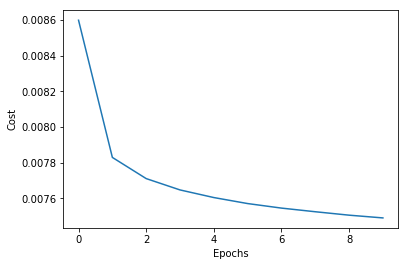

correct:95.770%


In [9]:
if __name__ == '__main__':
    k_in=784
    k_h=500
    k_out=10
    batch_size=200
    epochs=10
    lr=0.5
    eval_=train(k_in,k_h,k_out,batch_size,lr,epochs)
    plotfunc(epochs,eval_)
    test(batch_size)